___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Lab - 1 (ANN) <br><br>Assignment-1 Solution<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import  libraries & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 14)

In [6]:
df.isnull().sum().any()

False

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


<AxesSubplot:>

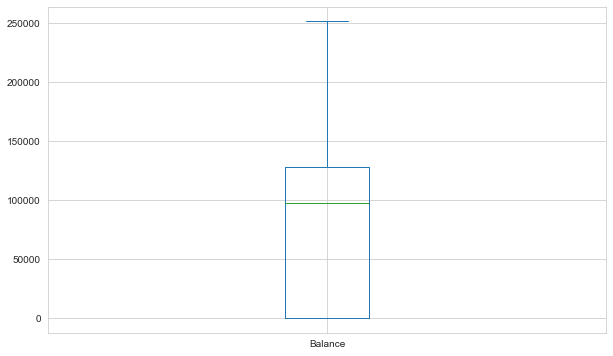

In [9]:
df.Balance.plot(kind="box")

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.drop(["RowNumber",'CustomerId', 'Surname'], axis=1, inplace=True)

0    7963
1    2037
Name: Exited, dtype: int64


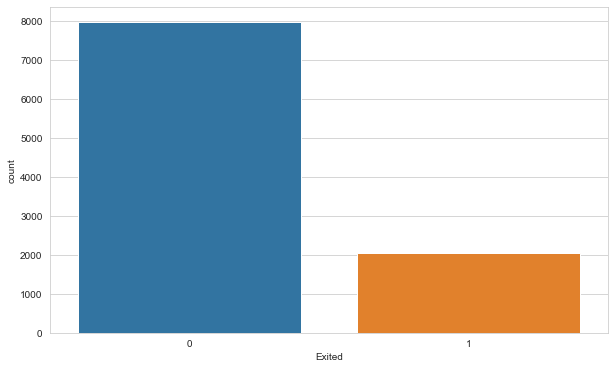

In [12]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]);

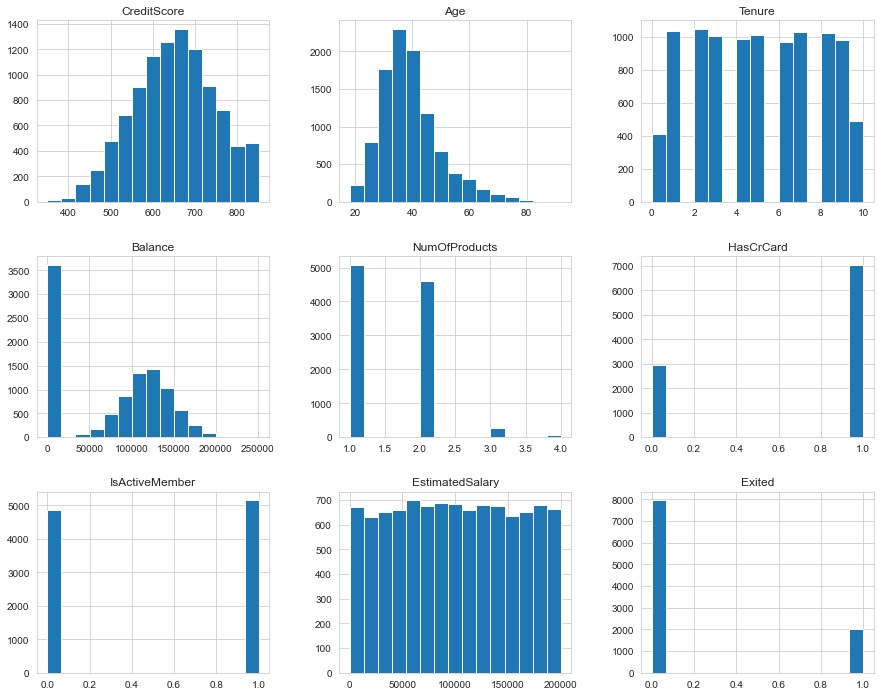

In [13]:
df.hist(figsize=(15, 12), bins=15);

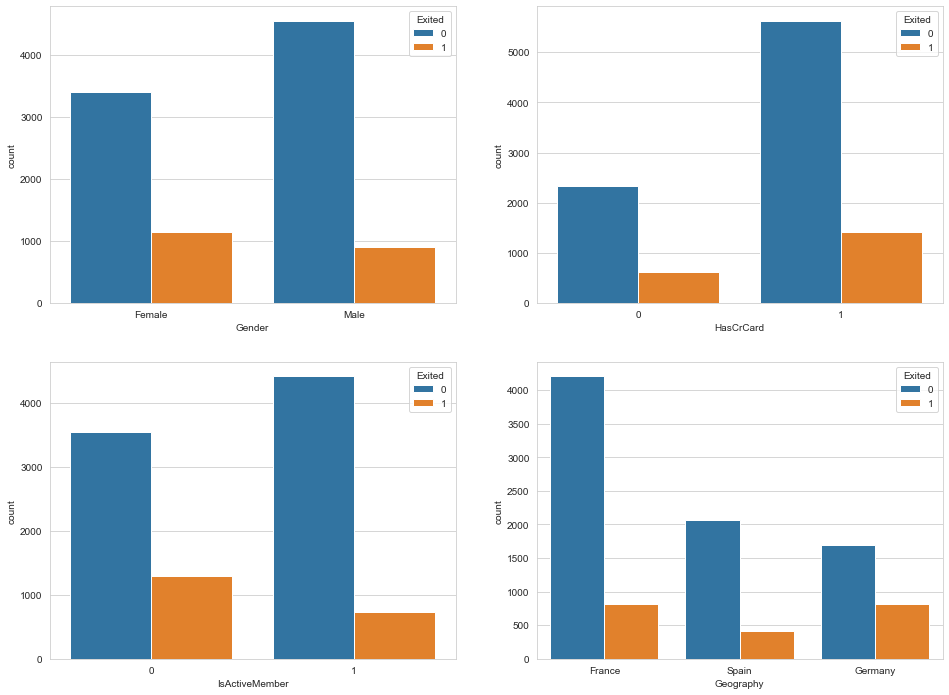

In [14]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

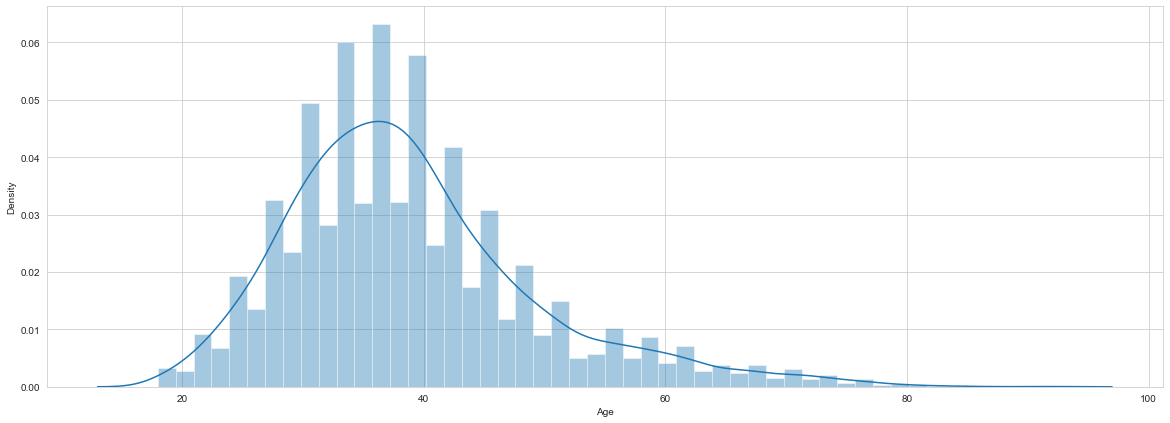

In [15]:
plt.figure(figsize=(20, 7))
sns.distplot(df.Age);

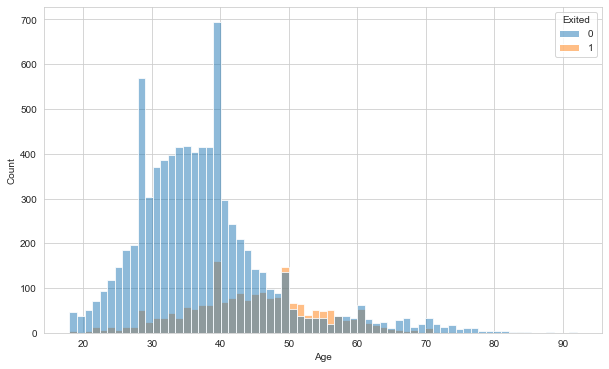

In [16]:
sns.histplot(data = df, x = "Age", hue = "Exited", fill=True);

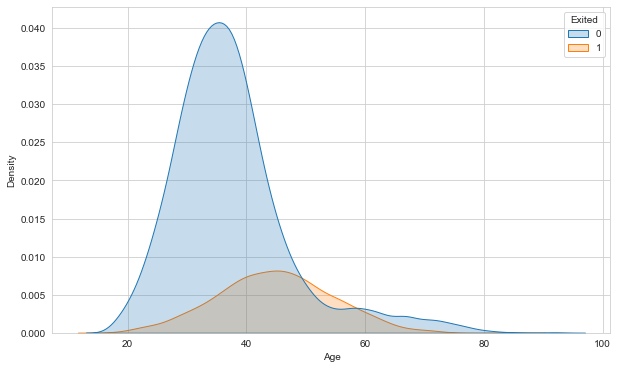

In [17]:
sns.kdeplot(data = df, x = "Age", hue = "Exited", fill=True);

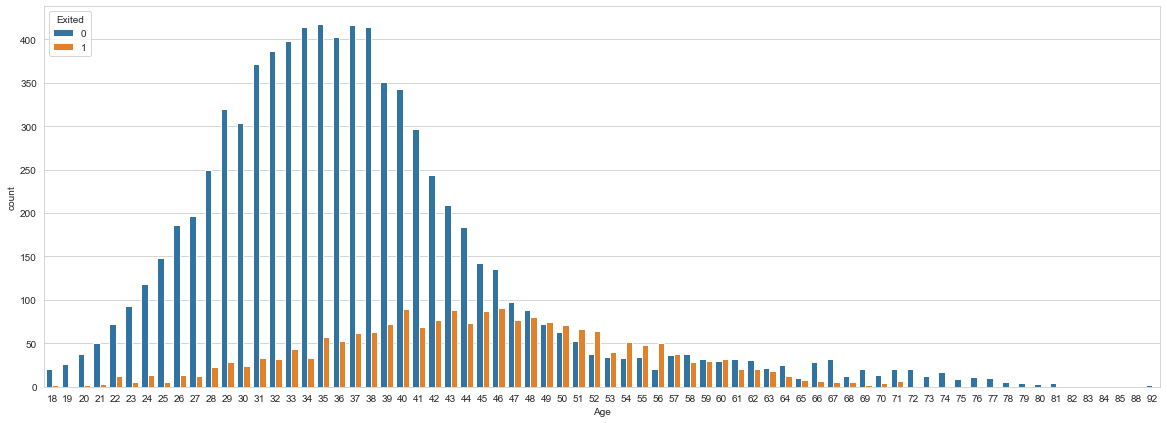

In [18]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

<AxesSubplot:>

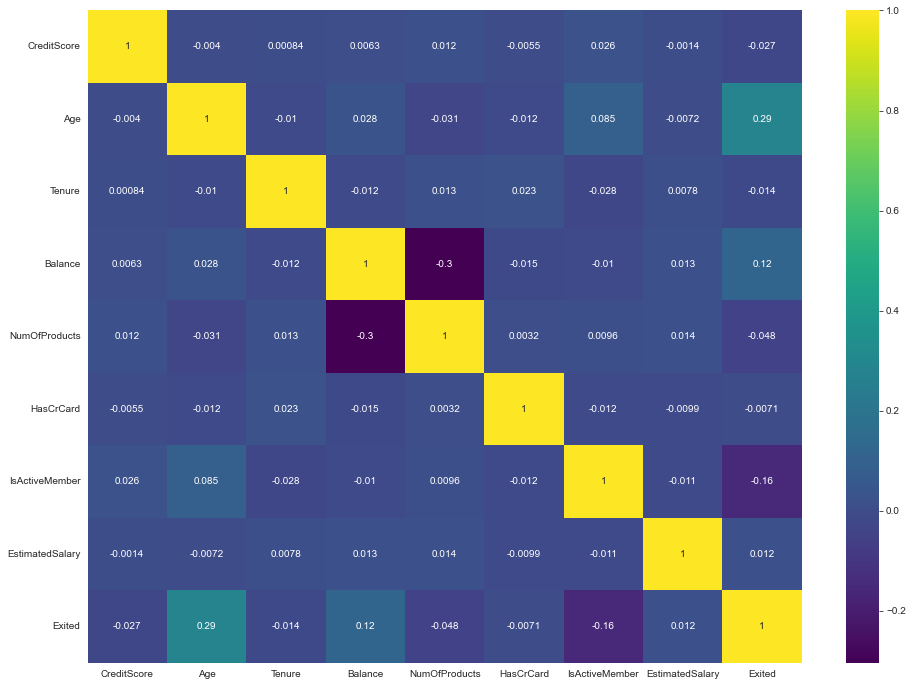

In [19]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

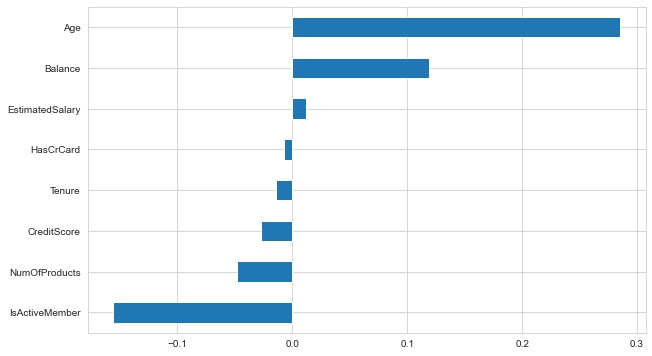

In [20]:
df.corr()['Exited'][:-1].sort_values().plot.barh();

In [21]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


In [22]:
df.shape

(10000, 12)

In [23]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,0,0,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,1,0,1


# Preprocessing of Data

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [25]:
seed = 42

In [26]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

How many hidden layers should I use? : http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-9.html (mirror: http://francky.me/aifaq/FAQ-comp.ai.neural-net.pdf)

How many hidden units should I use? : http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html (mirror: http://francky.me/aifaq/FAQ-comp.ai.neural-net.pdf)

In [29]:
X_train.shape

(9000, 11)

## without class_weigth

In [37]:
tf.random.set_seed(seed)

model = Sequential()

tf.keras.backend.clear_session() 

model.add(Dense(32, activation="relu" , input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [38]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.5197 - recall: 0.0000e+00 - val_loss: 0.4797 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4742 - recall: 0.0000e+00 - val_loss: 0.4506 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4582 - recall: 0.0345 - val_loss: 0.4357 - val_recall: 0.0663
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4473 - recall: 0.0969 - val_loss: 0.4216 - val_recall: 0.1878
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4388 - recall: 0.1943 - val_loss: 0.4107 - val_recall: 0.2044
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4292 - recall: 0.1925 - val_loss: 0.4048 - val_recall: 0.2210
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4226 - recall: 0.2421 - val_loss: 0.3934 - val_recall: 0.3204
Epoch 8/300
64/64 [======

64/64 [==============================] - 0s 3ms/step - loss: 0.3200 - recall: 0.4843 - val_loss: 0.3020 - val_recall: 0.5856
Epoch 120/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3202 - recall: 0.4849 - val_loss: 0.3016 - val_recall: 0.5967
Epoch 121/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3200 - recall: 0.4873 - val_loss: 0.3080 - val_recall: 0.6022
Epoch 122/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3223 - recall: 0.5030 - val_loss: 0.3041 - val_recall: 0.4972
Epoch 123/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3218 - recall: 0.4800 - val_loss: 0.3100 - val_recall: 0.4917
Epoch 124/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3205 - recall: 0.4831 - val_loss: 0.3055 - val_recall: 0.5249
Epoch 125/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3206 - recall: 0.4946 - val_loss: 0.3048 - val_recall: 0.5249
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3136 - recall: 0.5115 - val_loss: 0.3024 - val_recall: 0.6298
Epoch 179/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3118 - recall: 0.4970 - val_loss: 0.3032 - val_recall: 0.5635
Epoch 180/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3117 - recall: 0.5097 - val_loss: 0.3057 - val_recall: 0.6464
Epoch 181/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3116 - recall: 0.5073 - val_loss: 0.3081 - val_recall: 0.6077
Epoch 182/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3124 - recall: 0.5224 - val_loss: 0.3062 - val_recall: 0.5470
Epoch 183/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3116 - recall: 0.5067 - val_loss: 0.3042 - val_recall: 0.6022
Epoch 184/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3111 - recall: 0.5145 - val_loss: 0.3052 - val_recall: 0.6022
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3054 - recall: 0.5272 - val_loss: 0.3038 - val_recall: 0.5414
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3080 - recall: 0.5188 - val_loss: 0.3051 - val_recall: 0.6409
Epoch 239/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3061 - recall: 0.5315 - val_loss: 0.3067 - val_recall: 0.5856
Epoch 240/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3055 - recall: 0.5285 - val_loss: 0.3045 - val_recall: 0.5691
Epoch 241/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3049 - recall: 0.5248 - val_loss: 0.3068 - val_recall: 0.5525
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3063 - recall: 0.5315 - val_loss: 0.3048 - val_recall: 0.5193
Epoch 243/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3053 - recall: 0.5248 - val_loss: 0.3074 - val_recall: 0.6188
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.2992 - recall: 0.5345 - val_loss: 0.3045 - val_recall: 0.5801
Epoch 297/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3007 - recall: 0.5339 - val_loss: 0.3078 - val_recall: 0.6077
Epoch 298/300
64/64 [==============================] - 0s 3ms/step - loss: 0.2998 - recall: 0.5381 - val_loss: 0.3055 - val_recall: 0.5580
Epoch 299/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3001 - recall: 0.5448 - val_loss: 0.3090 - val_recall: 0.5580
Epoch 300/300
64/64 [==============================] - 0s 3ms/step - loss: 0.2989 - recall: 0.5424 - val_loss: 0.3074 - val_recall: 0.5525


In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

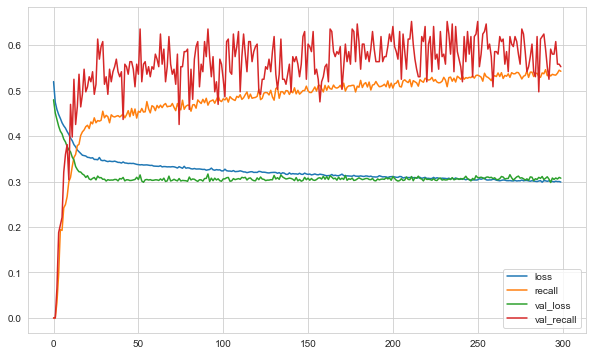

In [40]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [41]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[760  36]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.73      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.74      1000
weighted avg       0.85      0.86      0.84      1000



### Precision-Recall Curve and AP (Average Precision) for model

32/32 [==============================] - 0s 2ms/step


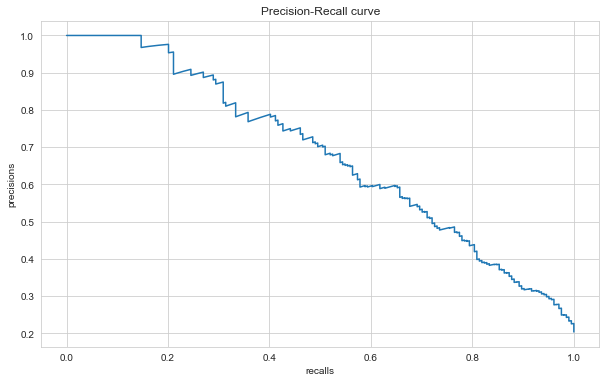

In [63]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [64]:
average_precision_score(y_test, y_pred_proba)

0.6803275145643309

## with class_weigth

In [65]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [66]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [67]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6848 - recall: 0.2766 - val_loss: 0.6259 - val_recall: 0.3757
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6685 - recall: 0.4346 - val_loss: 0.6143 - val_recall: 0.5967
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6552 - recall: 0.5478 - val_loss: 0.5720 - val_recall: 0.5193
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6411 - recall: 0.6041 - val_loss: 0.5626 - val_recall: 0.6519
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6210 - recall: 0.6737 - val_loss: 0.5702 - val_recall: 0.7348
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5910 - recall: 0.7058 - val_loss: 0.4912 - val_recall: 0.5967
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5748 - recall: 0.7131 - val_loss: 0.5505 - val_recall: 0.7459
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 3ms/step - loss: 0.4403 - recall: 0.7809 - val_loss: 0.4202 - val_recall: 0.8177
Epoch 120/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4394 - recall: 0.7863 - val_loss: 0.4094 - val_recall: 0.8122
Epoch 121/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4392 - recall: 0.7863 - val_loss: 0.4290 - val_recall: 0.8232
Epoch 122/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4428 - recall: 0.7887 - val_loss: 0.3665 - val_recall: 0.7680
Epoch 123/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4418 - recall: 0.7863 - val_loss: 0.4253 - val_recall: 0.7956
Epoch 124/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4396 - recall: 0.7887 - val_loss: 0.4043 - val_recall: 0.8066
Epoch 125/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4395 - recall: 0.7930 - val_loss: 0.3923 - val_recall: 0.7901
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4294 - recall: 0.7900 - val_loss: 0.4649 - val_recall: 0.8287
Epoch 179/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4271 - recall: 0.7887 - val_loss: 0.3945 - val_recall: 0.7901
Epoch 180/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4272 - recall: 0.7918 - val_loss: 0.4380 - val_recall: 0.8177
Epoch 181/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4270 - recall: 0.7887 - val_loss: 0.4417 - val_recall: 0.8066
Epoch 182/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4297 - recall: 0.7930 - val_loss: 0.3853 - val_recall: 0.7901
Epoch 183/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4265 - recall: 0.7900 - val_loss: 0.4139 - val_recall: 0.8177
Epoch 184/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4274 - recall: 0.7924 - val_loss: 0.4055 - val_recall: 0.8011
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4194 - recall: 0.7942 - val_loss: 0.4005 - val_recall: 0.7901
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4215 - recall: 0.7893 - val_loss: 0.4113 - val_recall: 0.8066
Epoch 239/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4172 - recall: 0.7978 - val_loss: 0.4423 - val_recall: 0.8011
Epoch 240/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4184 - recall: 0.7900 - val_loss: 0.3987 - val_recall: 0.7956
Epoch 241/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4167 - recall: 0.7972 - val_loss: 0.4053 - val_recall: 0.8011
Epoch 242/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4188 - recall: 0.8002 - val_loss: 0.3754 - val_recall: 0.7514
Epoch 243/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4183 - recall: 0.7797 - val_loss: 0.4590 - val_recall: 0.8177
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.4115 - recall: 0.7942 - val_loss: 0.4308 - val_recall: 0.8066
Epoch 297/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4111 - recall: 0.7978 - val_loss: 0.4218 - val_recall: 0.7956
Epoch 298/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4092 - recall: 0.7924 - val_loss: 0.4055 - val_recall: 0.7845
Epoch 299/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4104 - recall: 0.8045 - val_loss: 0.3917 - val_recall: 0.7845
Epoch 300/300
64/64 [==============================] - 0s 4ms/step - loss: 0.4097 - recall: 0.7930 - val_loss: 0.4026 - val_recall: 0.7790


<AxesSubplot:>

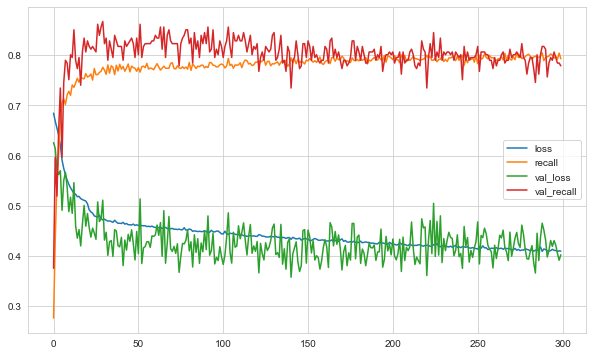

In [68]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [69]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[628 168]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.80      1000



### Precision-Recall Curve and AP (Average Precision) for model

32/32 [==============================] - 0s 1ms/step


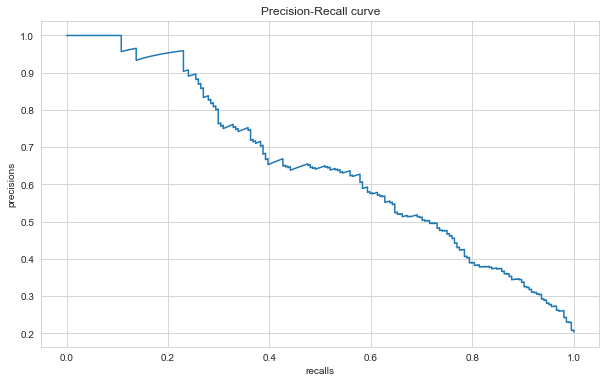

In [70]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [71]:
average_precision_score(y_test, y_pred_proba)

0.6506506710553627

### Increasing Learning Rate and Observing The Results

In [72]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

# lr=0.01 => led to overfitting
# lr=0.005 => led to overfitting
# lr=0.003 => led to overfitting

Loss function in Deep Learning
1. Regression

MSE(Mean Squared Error)
MAE(Mean Absolute Error)
Hubber loss

2. Classification

Binary cross-entropy
Categorical cross-entropy

In [73]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 6ms/step - loss: 0.6584 - recall: 0.5278 - val_loss: 0.5800 - val_recall: 0.6796
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6068 - recall: 0.6834 - val_loss: 0.5917 - val_recall: 0.7514
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5838 - recall: 0.6925 - val_loss: 0.5362 - val_recall: 0.7127
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5619 - recall: 0.7034 - val_loss: 0.5705 - val_recall: 0.8066
Epoch 5/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5370 - recall: 0.7258 - val_loss: 0.4387 - val_recall: 0.7624
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5102 - recall: 0.7300 - val_loss: 0.4685 - val_recall: 0.8066
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4940 - recall: 0.7567 - val_loss: 0.4134 - val_recall: 0.7845
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 3ms/step - loss: 0.4135 - recall: 0.8021 - val_loss: 0.4868 - val_recall: 0.8453
Epoch 120/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4086 - recall: 0.8033 - val_loss: 0.4310 - val_recall: 0.8177
Epoch 121/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4086 - recall: 0.8008 - val_loss: 0.5405 - val_recall: 0.8729
Epoch 122/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4222 - recall: 0.8087 - val_loss: 0.3757 - val_recall: 0.7403
Epoch 123/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4086 - recall: 0.7960 - val_loss: 0.4649 - val_recall: 0.7956
Epoch 124/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4116 - recall: 0.8002 - val_loss: 0.4421 - val_recall: 0.8011
Epoch 125/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4114 - recall: 0.8075 - val_loss: 0.4539 - val_recall: 0.8287
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3962 - recall: 0.8117 - val_loss: 0.4321 - val_recall: 0.8066
Epoch 179/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3909 - recall: 0.8184 - val_loss: 0.4413 - val_recall: 0.8011
Epoch 180/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3896 - recall: 0.8105 - val_loss: 0.4559 - val_recall: 0.7956
Epoch 181/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3956 - recall: 0.8190 - val_loss: 0.4278 - val_recall: 0.7735
Epoch 182/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3907 - recall: 0.8166 - val_loss: 0.3997 - val_recall: 0.7459
Epoch 183/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3853 - recall: 0.8232 - val_loss: 0.4730 - val_recall: 0.7845
Epoch 184/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3856 - recall: 0.8214 - val_loss: 0.4709 - val_recall: 0.8232
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3802 - recall: 0.8444 - val_loss: 0.4355 - val_recall: 0.7403
Epoch 238/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3796 - recall: 0.8378 - val_loss: 0.4794 - val_recall: 0.8287
Epoch 239/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3769 - recall: 0.8366 - val_loss: 0.4473 - val_recall: 0.7514
Epoch 240/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3743 - recall: 0.8329 - val_loss: 0.4460 - val_recall: 0.7569
Epoch 241/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3753 - recall: 0.8366 - val_loss: 0.4473 - val_recall: 0.7735
Epoch 242/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3776 - recall: 0.8329 - val_loss: 0.4223 - val_recall: 0.7569
Epoch 243/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3752 - recall: 0.8317 - val_loss: 0.4733 - val_recall: 0.7956
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 3ms/step - loss: 0.3587 - recall: 0.8559 - val_loss: 0.5017 - val_recall: 0.8343
Epoch 297/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3682 - recall: 0.8438 - val_loss: 0.4998 - val_recall: 0.8066
Epoch 298/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3589 - recall: 0.8505 - val_loss: 0.4706 - val_recall: 0.7569
Epoch 299/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3587 - recall: 0.8547 - val_loss: 0.4654 - val_recall: 0.7845
Epoch 300/300
64/64 [==============================] - 0s 3ms/step - loss: 0.3648 - recall: 0.8529 - val_loss: 0.4583 - val_recall: 0.7624


<AxesSubplot:>

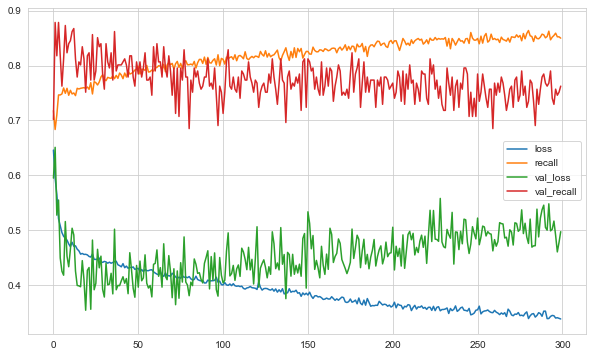

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [76]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[634 162]
 [ 58 146]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       796
           1       0.47      0.72      0.57       204

    accuracy                           0.78      1000
   macro avg       0.70      0.76      0.71      1000
weighted avg       0.83      0.78      0.79      1000



### Adding Dropout Layer

In [77]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [78]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 7s 38ms/step - loss: 0.6908 - recall: 0.6646 - val_loss: 0.6801 - val_recall: 0.6133
Epoch 2/300
64/64 [==============================] - 2s 30ms/step - loss: 0.6758 - recall: 0.6429 - val_loss: 0.6698 - val_recall: 0.7017
Epoch 3/300
64/64 [==============================] - 1s 18ms/step - loss: 0.6600 - recall: 0.6435 - val_loss: 0.6116 - val_recall: 0.5801
Epoch 4/300
64/64 [==============================] - 1s 23ms/step - loss: 0.6515 - recall: 0.6368 - val_loss: 0.5945 - val_recall: 0.5856
Epoch 5/300
64/64 [==============================] - 2s 34ms/step - loss: 0.6419 - recall: 0.6374 - val_loss: 0.6158 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 1s 9ms/step - loss: 0.6331 - recall: 0.6283 - val_loss: 0.5740 - val_recall: 0.6575
Epoch 7/300
64/64 [==============================] - 1s 10ms/step - loss: 0.6216 - recall: 0.6447 - val_loss: 0.6000 - val_recall: 0.7238
Epoch 8/300
64/64 [================

<AxesSubplot:>

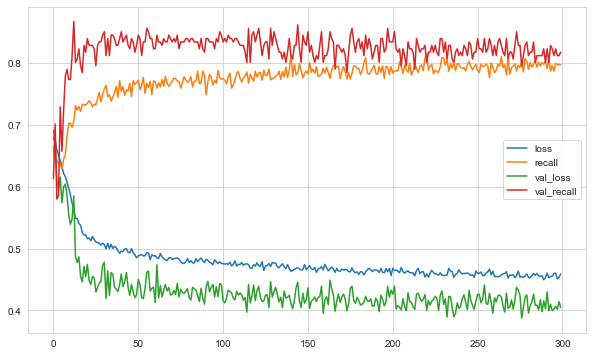

In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [80]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[624 172]
 [ 42 162]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       796
           1       0.49      0.79      0.60       204

    accuracy                           0.79      1000
   macro avg       0.71      0.79      0.73      1000
weighted avg       0.84      0.79      0.80      1000



### Adding Early Stop

#### Monitor the "val_loss" as metric

In [81]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [82]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [83]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 2s 9ms/step - loss: 0.6692 - recall: 0.6223 - val_loss: 0.6168 - val_recall: 0.7017
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6350 - recall: 0.6429 - val_loss: 0.6050 - val_recall: 0.7403
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6019 - recall: 0.6695 - val_loss: 0.5404 - val_recall: 0.7624
Epoch 4/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5642 - recall: 0.7040 - val_loss: 0.5372 - val_recall: 0.8343
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5413 - recall: 0.7088 - val_loss: 0.4211 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5324 - recall: 0.7016 - val_loss: 0.4486 - val_recall: 0.7901
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5201 - recall: 0.7506 - val_loss: 0.5027 - val_recall: 0.8674
Epoch 8/300
64/64 [======================

<AxesSubplot:>

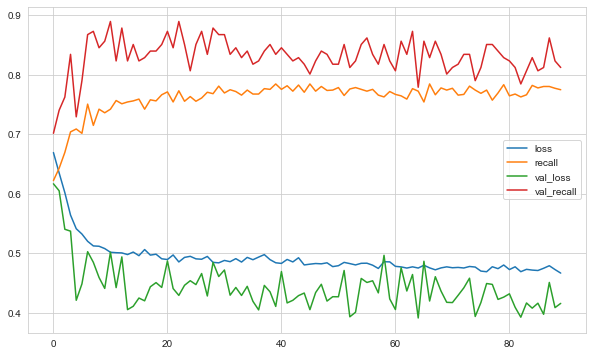

In [84]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [85]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[651 145]
 [ 51 153]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       796
           1       0.51      0.75      0.61       204

    accuracy                           0.80      1000
   macro avg       0.72      0.78      0.74      1000
weighted avg       0.84      0.80      0.82      1000



#### Monitor the "val_recall" as metric

In [86]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [87]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [88]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 2s 8ms/step - loss: 0.6692 - recall: 0.6223 - val_loss: 0.6168 - val_recall: 0.7017
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6350 - recall: 0.6429 - val_loss: 0.6050 - val_recall: 0.7403
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6019 - recall: 0.6695 - val_loss: 0.5404 - val_recall: 0.7624
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5642 - recall: 0.7040 - val_loss: 0.5372 - val_recall: 0.8343
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5413 - recall: 0.7088 - val_loss: 0.4211 - val_recall: 0.7293
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5324 - recall: 0.7016 - val_loss: 0.4486 - val_recall: 0.7901
Epoch 7/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5201 - recall: 0.7506 - val_loss: 0.5027 - val_recall: 0.8674
Epoch 8/300
64/64 [======================

<AxesSubplot:>

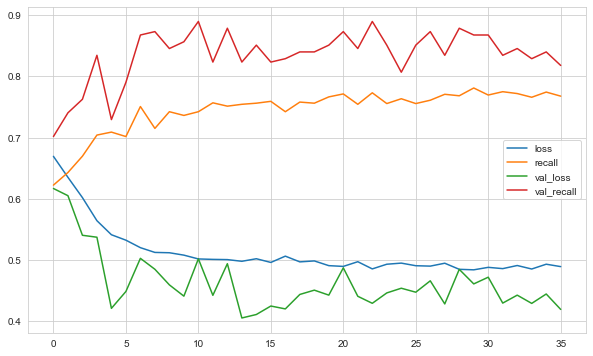

In [89]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [90]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[528 268]
 [ 30 174]]
              precision    recall  f1-score   support

           0       0.95      0.66      0.78       796
           1       0.39      0.85      0.54       204

    accuracy                           0.70      1000
   macro avg       0.67      0.76      0.66      1000
weighted avg       0.83      0.70      0.73      1000



## GridSearchCV

In [91]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [92]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [93]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [94]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=15,
                           restore_best_weights = True)

In [95]:
tf.random.set_seed(seed)
classifier = KerasClassifier(build_fn=build_classifier, validation_split = 0.1, epochs=200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


2022-10-04 18:42:06.226127: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 18:42:06.228491: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 18:42:06.230724: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
51/51 [==============================] - 4s 23ms/step - loss: 0.6900 - recall: 0.2306 - val_loss: 0.6748 - val_recall: 0.2583
Epoch 2/200
51/51 [==============================] - 4s 23ms/step - loss: 0.6934 - recall: 0.4951 - val_loss: 0.6731 - val_recall: 0.5960
Epoch 2/200
51/51 [==============================] - 4s 24ms/step - loss: 0.6853 - recall: 0.4235 - val_loss: 0.6662 - val_recall: 0.4636
Epoch 2/200
51/51 [==============================] - 4s 24ms/step - loss: 0.6971 - recall: 0.6017 - val_loss: 0.6493 - val_recall: 0.4437
Epoch 2/200
51/51 [==============================] - 0s 6ms/step - loss: 0.6712 - recall: 0.5796 - val_loss: 0.6303 - val_recall: 0.4636
Epoch 3/200
51/51 [==============================] - 0s 8ms/step - loss: 0.6789 - recall: 0.2367 - val_loss: 0.6295 - val_recall: 0.4106
Epoch 3/200
51/51 [==============================] - 0s 7ms/step - loss: 0.6807 - recall: 0.5843 - val_loss: 0.6418 - val_recall: 0.6689
E

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ffda04b8d30>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [96]:
grid_model.best_score_

0.8604095834692504

In [97]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.nadam.Nadam}

In [98]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[521 275]
 [ 29 175]]
              precision    recall  f1-score   support

           0       0.95      0.65      0.77       796
           1       0.39      0.86      0.54       204

    accuracy                           0.70      1000
   macro avg       0.67      0.76      0.65      1000
weighted avg       0.83      0.70      0.73      1000



### Precision-Recall Curve and AP (Average Precision) for grid_model

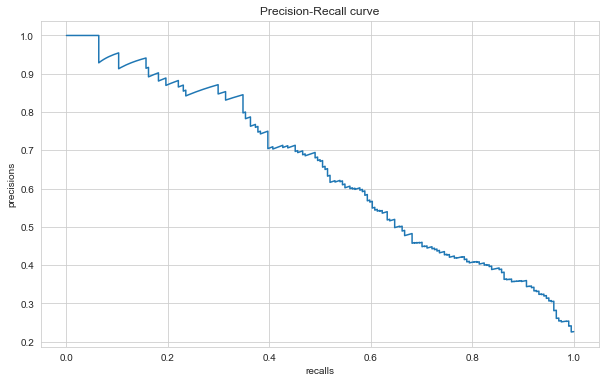

In [99]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [100]:
average_precision_score(y_test, y_pred_proba)

0.6496717156368637

## Final Model and Model Deployment

In [101]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [102]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = RMSprop(lr=0.005)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=15,
                           restore_best_weights = True)
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
71/71 [==============================] - 15s 58ms/step - loss: 0.6437 - recall: 0.5897 - val_loss: 0.6109 - val_recall: 0.5931
Epoch 2/200
71/71 [==============================] - 1s 12ms/step - loss: 0.6074 - recall: 0.6770 - val_loss: 0.5906 - val_recall: 0.6373
Epoch 3/200
71/71 [==============================] - 1s 10ms/step - loss: 0.5867 - recall: 0.6978 - val_loss: 0.5944 - val_recall: 0.6814
Epoch 4/200
71/71 [==============================] - 1s 11ms/step - loss: 0.5711 - recall: 0.6983 - val_loss: 0.5860 - val_recall: 0.7059
Epoch 5/200
71/71 [==============================] - 1s 14ms/step - loss: 0.5598 - recall: 0.7081 - val_loss: 0.5399 - val_recall: 0.6618
Epoch 6/200
71/71 [==============================] - 1s 11ms/step - loss: 0.5482 - recall: 0.7087 - val_loss: 0.5800 - val_recall: 0.7500
Epoch 7/200
71/71 [==============================] - 2s 26ms/step - loss: 0.5324 - recall: 0.7283 - val_loss: 0.4732 - val_recall: 0.6176
Epoch 8/200
71/71 [==============

<AxesSubplot:>

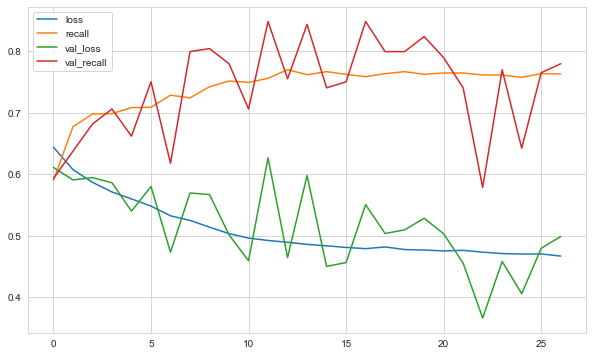

In [103]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [104]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[488 308]
 [ 31 173]]
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       796
           1       0.36      0.85      0.51       204

    accuracy                           0.66      1000
   macro avg       0.65      0.73      0.62      1000
weighted avg       0.82      0.66      0.69      1000



In [105]:
model.save('model_churn.h5')

### Prediction

In [151]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 0, dtype: float64

In [152]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [108]:
model.predict(single_customer)

array([[0.5980307]], dtype=float32)

In [109]:
df["Exited"].iloc[0]

1

## Comparison with ML

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [111]:
clf1 = RandomForestClassifier(random_state=seed, class_weight="balanced")
clf2 = SVC(probability=True, random_state=seed, class_weight="balanced")
clf3 = LogisticRegression(random_state=seed, class_weight="balanced")

In [112]:
[10**(-2+i) for i in range(5)]

[0.01, 0.1, 1, 10, 100]

In [113]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**(-2+i) for i in range(5)]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**(-2+i) for i in range(5)]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier'] = [clf3]

In [114]:
display(param1, param2, param3)

{'classifier__n_estimators': [10, 50, 100, 250],
 'classifier__max_depth': [5, 10, 20],
 'classifier': [RandomForestClassifier(class_weight='balanced', random_state=42)]}

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier': [SVC(class_weight='balanced', probability=True, random_state=42)]}

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__penalty': ['l1', 'l2'],
 'classifier': [LogisticRegression(class_weight='balanced', random_state=42)]}

In [115]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3]

In [116]:
pipeline

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [117]:
grid_model = GridSearchCV(pipeline, params, cv=5, n_jobs=-1,
                  scoring='recall').fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.

In [118]:
grid_model.best_params_

{'classifier': RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100}

In [119]:
grid_model.best_score_

0.7250413186224148

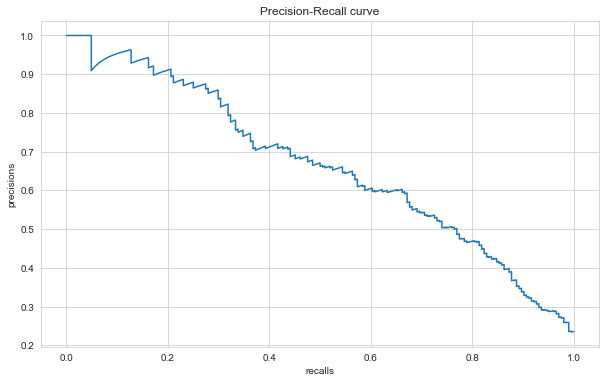

In [120]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='RF')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [121]:
average_precision_score(y_test, y_pred_proba)

0.6661971936946249

In [122]:
y_pred = grid_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[646 150]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       796
           1       0.50      0.75      0.60       204

    accuracy                           0.80      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.80      0.81      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___